# Predict Future Sales
You are provided with daily historical sales data. The task is to forecast the total amount of products sold in every shop for the test set. Note that the list of shops and products slightly changes every month. Creating a robust model that can handle such situations is part of the challenge.

## File descriptions
* sales_train.csv - the training set. Daily historical data from January 2013 to October 2015.
* test.csv - the test set. You need to forecast the sales for these shops and products for November 2015.
* sample_submission.csv - a sample submission file in the correct format.
* items.csv - supplemental information about the items/products.
* item_categories.csv  - supplemental information about the items categories.
* shops.csv- supplemental information about the shops.

In [1]:
import pandas as pd

items=r'/kaggle/input/competitive-data-science-predict-future-sales/items.csv'
categories=r'/kaggle/input/competitive-data-science-predict-future-sales/item_categories.csv'
train=r'/kaggle/input/competitive-data-science-predict-future-sales/sales_train.csv'
shops=r'/kaggle/input/competitive-data-science-predict-future-sales/shops.csv'
test=r'/kaggle/input/competitive-data-science-predict-future-sales/test.csv'

In [2]:
train=pd.read_csv(train)
train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [3]:
shops=pd.read_csv(shops)
shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [4]:
items=pd.read_csv(items)
items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [5]:
categories=pd.read_csv(categories)
categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


# Merged DataFrame
Data fields
* ID - an Id that represents a (Shop, Item) tuple within the test set
* shop_id - unique identifier of a shop
* item_id - unique identifier of a product
* item_category_id - unique identifier of item category
* item_cnt_day - number of products sold. You are predicting a monthly amount of this measure
* item_price - current price of an item
* date - date in format dd/mm/yyyy
* date_block_num - a consecutive month number, used for convenience. January 2013 is 0, February 2013 is 1,..., October 2015 is 33
* item_name - name of item

In [6]:
df=pd.merge(train, shops, on='shop_id')
df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,shop_name
0,02.01.2013,0,59,22154,999.0,1.0,"Ярославль ТЦ ""Альтаир"""
1,10.01.2013,0,59,22151,399.0,1.0,"Ярославль ТЦ ""Альтаир"""
2,04.01.2013,0,59,5603,699.0,1.0,"Ярославль ТЦ ""Альтаир"""
3,19.01.2013,0,59,5587,199.0,2.0,"Ярославль ТЦ ""Альтаир"""
4,31.01.2013,0,59,5613,5571.0,1.0,"Ярославль ТЦ ""Альтаир"""


In [7]:
item_count=list(df['item_cnt_day'].unique())
print(item_count)

[1.0, 2.0, -1.0, 3.0, 5.0, 6.0, 4.0, -2.0, 10.0, 8.0, 9.0, 7.0, 16.0, 13.0, 12.0, 14.0, 26.0, 11.0, 20.0, 39.0, 28.0, 27.0, 34.0, 19.0, 31.0, 22.0, 17.0, 29.0, 45.0, 21.0, 18.0, 56.0, 15.0, 80.0, 69.0, 40.0, 24.0, 32.0, 23.0, 25.0, 77.0, 41.0, 33.0, 37.0, 36.0, 38.0, 70.0, 30.0, 44.0, 71.0, 48.0, 62.0, 264.0, 110.0, 133.0, 51.0, 46.0, 60.0, 43.0, 65.0, 84.0, 50.0, 47.0, 52.0, 85.0, 35.0, 54.0, 68.0, 59.0, 91.0, 64.0, 87.0, 74.0, 42.0, 501.0, 93.0, 49.0, 53.0, 147.0, 72.0, 205.0, 67.0, 63.0, 55.0, 222.0, 207.0, 82.0, 148.0, 134.0, 78.0, 79.0, 83.0, 405.0, 103.0, 98.0, 100.0, 92.0, -3.0, -4.0, 121.0, 61.0, 156.0, 73.0, 66.0, 145.0, 57.0, 101.0, 81.0, 131.0, 401.0, 502.0, 151.0, 75.0, 240.0, 111.0, 104.0, 76.0, 118.0, 138.0, -5.0, 89.0, 194.0, 255.0, 153.0, -16.0, 117.0, -6.0, 200.0, 150.0, 106.0, 109.0, 97.0, -22.0, 96.0, 242.0, 105.0, 126.0, 58.0, 99.0, 171.0, 130.0, 115.0, 90.0, 124.0, 149.0, 132.0, 195.0, 512.0, -9.0, 142.0, 163.0, 108.0, 500.0, 1000.0, 127.0, 624.0, 187.0, 140.0, 480

In [8]:
df.isnull().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
shop_name         0
dtype: int64

# Test Data
We will make predictions on the following test dataset.

In [9]:
testDF=pd.read_csv(test)
testDF.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


# Feature Engineer

In [10]:
df['Month'] = df['date'].str[3:5].astype(int)
months=list(df['Month'].unique())
print(months)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


In [11]:
df['Day'] = df['date'].str[:2].astype(int)
days=list(sorted(df['Day'].unique()))
print(days)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]


In [12]:
df['Year'] = df['date'].str[6:10].astype(int)
years=list(sorted(df['Year'].unique()))
print(years)

[2013, 2014, 2015]


In [13]:
df['total_sales']=df['item_price']*df['item_cnt_day']
df=df.drop(['item_price', 'item_cnt_day'], axis=1)

In [14]:
df.head()

,date,date_block_num,shop_id,item_id,shop_name,Month,Day,Year,total_sales
0,02.01.2013,0,59,22154,"Ярославль ТЦ ""Альтаир""",1,2,2013,999.0
1,10.01.2013,0,59,22151,"Ярославль ТЦ ""Альтаир""",1,10,2013,399.0
2,04.01.2013,0,59,5603,"Ярославль ТЦ ""Альтаир""",1,4,2013,699.0
3,19.01.2013,0,59,5587,"Ярославль ТЦ ""Альтаир""",1,19,2013,398.0
4,31.01.2013,0,59,5613,"Ярославль ТЦ ""Альтаир""",1,31,2013,5571.0


# Graph Important Columns

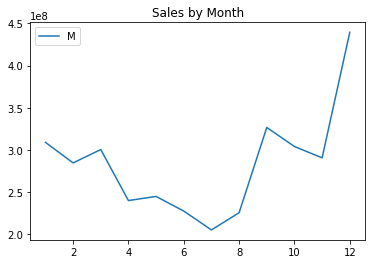

In [15]:
import matplotlib.pyplot as plt

monthSales=list(df.groupby(by="Month")['total_sales'].sum())

plt.plot(months, monthSales)
plt.title("Sales by Month")
plt.legend("Monthly Sales")
plt.show()

[1217524733, 1346778478, 834623131]
[2013, 2014, 2015]


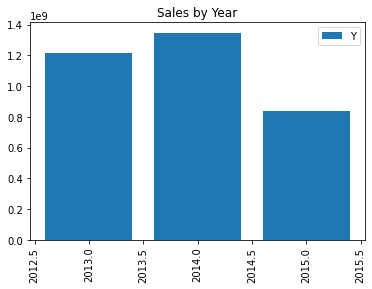

In [16]:
yearSales=list(df.groupby(by="Year")['total_sales'].sum())
yearSales=[int(x) for x in yearSales]
print(yearSales)
print(years)

plt.bar(years, yearSales)
plt.title("Sales by Year")
plt.xticks(rotation=90)
plt.legend("Year Sales")
plt.show()

# Numeric DataFrame

In [17]:
df=df.select_dtypes('number')
df.head()

,date_block_num,shop_id,item_id,Month,Day,Year,total_sales
0,0,59,22154,1,2,2013,999.0
1,0,59,22151,1,10,2013,399.0
2,0,59,5603,1,4,2013,699.0
3,0,59,5587,1,19,2013,398.0
4,0,59,5613,1,31,2013,5571.0


In [18]:
X=df.drop('total_sales', axis=1)
y=df['total_sales']
#print(y)

# Split Data

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=42)
#print(X_train)

# XGBOOST

In [20]:
import xgboost as xgb
from xgboost import XGBRegressor

In [21]:
xgb = xgb.XGBRegressor()
xgb.fit(X_train, y_train)
y_pred=xgb.predict(X_test)
print(y_pred)

[ 478.19922  418.87726 2507.0232  ...  785.64716  602.67523 1451.4086 ]


In [22]:
from sklearn.metrics import r2_score, roc_auc_score

print(r2_score(y_test, y_pred).round(4))
#print(roc_auc_score(y_test, y_pred))

0.5045


# Feature Importances

[0.27260247 0.07072572 0.16761984 0.09740683 0.39164513 0.        ]


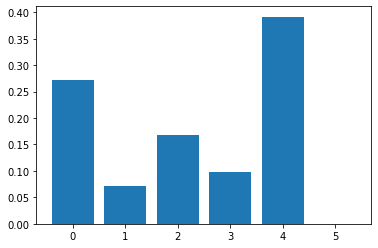

In [23]:
from xgboost import plot_importance
from matplotlib import pyplot

print(xgb.feature_importances_)
pyplot.bar(range(len(xgb.feature_importances_)), xgb.feature_importances_)
pyplot.show()

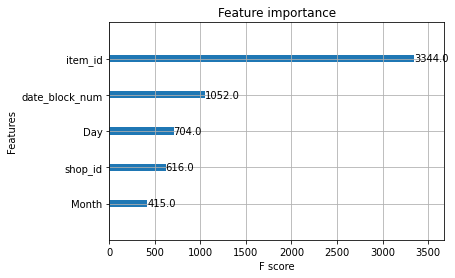

In [24]:
plot_importance(xgb)
pyplot.show()

# Test Data

In [25]:
test=pd.read_csv(test)
testID=test['ID']
test=test.drop('ID', axis=1)
test.head()

,shop_id,item_id
0,5,5037
1,5,5320
2,5,5233
3,5,5232
4,5,5268


# Test Merged Data
This prediction will be much different than a typical prediction because the test dataset has to be joined on two variables both item_id and shop_id. Since we need to align the test data with previous train data, we will need to use a right join. That way the item_id and shop_id can be predicted through previous X_train data.

In [26]:
testDF=pd.merge(test, df, on=['item_id', 'shop_id'], how='right').reset_index(drop=True)
testDF.head()

,shop_id,item_id,date_block_num,Month,Day,Year,total_sales
0,59,22154,0,1,2,2013,999.0
1,59,22151,0,1,10,2013,399.0
2,59,5603,0,1,4,2013,699.0
3,59,5587,0,1,19,2013,398.0
4,59,5613,0,1,31,2013,5571.0


In [27]:
cols=list(X.columns)
print(cols)

['date_block_num', 'shop_id', 'item_id', 'Month', 'Day', 'Year']


In [28]:
testDF=testDF[cols]
testDF.head()

,date_block_num,shop_id,item_id,Month,Day,Year
0,0,59,22154,1,2,2013
1,0,59,22151,1,10,2013
2,0,59,5603,1,4,2013
3,0,59,5587,1,19,2013
4,0,59,5613,1,31,2013


In [29]:
finalPred=xgb.predict(testDF)
print(finalPred)

[ 514.0624   517.7608   857.60876 ... 1178.3224  1255.634   1510.8212 ]


# Submit File
Submissions are evaluated by root mean squared error (RMSE) . True target values are clipped into [0,20] range.

In [30]:
testID=list(testID)
finalPred=list(finalPred)
submitDF=pd.DataFrame(data=zip(testID, finalPred), columns=['ID', 'item_cnt_month'])
submitDF.head()

,ID,item_cnt_month
0,0,514.062378
1,1,517.760803
2,2,857.608765
3,3,549.328918
4,4,3704.688965


In [31]:
submitDF.to_csv('submission.csv', index=False)
print("Submit File")

Submit File


In [32]:
#Sample Output:
sample='/kaggle/input/competitive-data-science-predict-future-sales/sample_submission.csv'
sample=pd.read_csv(sample)
itemList=list(sample['item_cnt_month'].unique())
print(itemList)
idList=list(sample['ID'].unique())
print(max(idList))
sample.head()

[0.5]
214199


,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5
